# Introduction

*I will perform data cleansing, wrangling and analyzing on 3 datasets that contains data about YouTube Trending videos in 3 different parts of the world - USA, Canada and Great Britain.*

### Tools Used

*This analysis was performed using Python and a group of Python libraries including Pandas, Matplotlib, Numpy and more. The analysis were performed in a Jupyter Notebook.*

### The Goal

*The goal of the analysis is to find answers to various questions and patterns by exploring the data.*

### Questions that the business team wants to be answered:

In [32]:
# 1) Are there any clear differences between trending videos depending on the region?
# 2) Which video remained the most on the trending videos list?
# 3) Which video category has the largest number of trending videos? Does the category give
# any advantage in order to become trending?
# 4) How are views, likes and dislikes, title length, and other attributes correlated with (relate
# to) each other? Are they connected in any way?
# 5) If Nordigen would upload a video, what words in the title (or description) or tags would
# you recommend to use? (In hopes to make the video trending)

### Additional Questions that I am interested in:

In [204]:
# 1) Which videos had the most & the least views & comments in each location (USA, Canada, GB)?
# 2) 

#### Importing required Python libraries for analysis.

In [201]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

##### Reading dataset "US videos" and getting familiar with it.

In [12]:
usa = pd.read_csv('USvideos.csv', sep=';')
usa.head()

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,",'shantell martin'",804.0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,",'last week tonight trump presidency','last we...",806.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,",'racist superman','rudy','mancuso','king','ba...",805.0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,",'rhett and link','gmm','good mythical morning...",806.0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,",'ryan','higa','higatv','nigahiga','i dare you...",806.0


*The next table shows the data for each video in a transparent manner:*

In [195]:
usa.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
publish_time,2017-11-13 17:13:01
views,748374
likes,57527
dislikes,2966
comment_count,15954
thumbnail_link,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg


##### Shape of our Dataset

In [200]:
usa.shape

(46978, 17)

*Dataset consist of **46 978** rows and **17** columns.*

##### The names of all columns in this dataset

In [14]:
usa.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'country', 'tags', 'category_id'],
      dtype='object')

##### Code below shows the number of unique videos in the USA dataset

In [206]:
unique_videos = usa['video_id'].unique().shape[0]

In [207]:
unique_videos.(hist)

SyntaxError: invalid syntax (<ipython-input-207-289079f84309>, line 1)

## data types of columns

In [121]:
usa.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
country                    object
tags                       object
category_id               float64
dtype: object

*Columns like 'views', 'likes', 'dislikes' and 'comment_count' only need INT data type, instead of FLOAT in order to save memory, which is important if working with huge datasets.*

*That's why we can assing their data types appropriately*

In [136]:
column_datatypes_to_change = ['views', 'likes', 'dislikes', 'comment_count']
for column in column_datatypes_to_change:
    usa[column] = usa[column].astype(int)

In [167]:
usa.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
views                       int32
likes                       int32
dislikes                    int32
comment_count               int32
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
country                    object
tags                       object
category_id               float64
dtype: object

*Changing data types for **'trending_date'** and **'publish_time'**, so we can make analysis with them*

In [174]:
#usa['trending_date'] = pd.to_datetime(usa['trending_date'], format='%y.%d.%m')

In [169]:
usa['publish_time'] = pd.to_datetime(usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [175]:
usa.dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
publish_time              datetime64[ns]
views                              int32
likes                              int32
dislikes                           int32
comment_count                      int32
thumbnail_link                    object
comments_disabled                 object
ratings_disabled                  object
video_error_or_removed            object
description                       object
country                           object
tags                              object
category_id                      float64
dtype: object

## Missing data

*First of all, I want to know how much missing date (Null values) is in each of the columns.*

In [34]:
for i in usa.columns:
    null_rate = usa[i].isna().sum()/len(usa)*100
    if null_rate >= 0:
        print("Column '{}' null rate: {}&".format(i,round(null_rate,2)))

Column 'video_id' null rate: 0.0&
Column 'trending_date' null rate: 10.48&
Column 'title' null rate: 10.48&
Column 'channel_title' null rate: 10.85&
Column 'publish_time' null rate: 12.93&
Column 'views' null rate: 12.93&
Column 'likes' null rate: 12.93&
Column 'dislikes' null rate: 12.93&
Column 'comment_count' null rate: 12.93&
Column 'thumbnail_link' null rate: 12.93&
Column 'comments_disabled' null rate: 12.93&
Column 'ratings_disabled' null rate: 12.93&
Column 'video_error_or_removed' null rate: 12.93&
Column 'description' null rate: 14.15&
Column 'country' null rate: 15.39&
Column 'tags' null rate: 15.39&
Column 'category_id' null rate: 19.36&


*Column 'category_id' has the most missing values - almost the **fifth part** is missing.

In [123]:
usa.isnull().sum()

video_id                     0
trending_date             4923
title                     4923
channel_title             5097
publish_time              6076
views                     6076
likes                     6076
dislikes                  6076
comment_count             6076
thumbnail_link            6076
comments_disabled         6076
ratings_disabled          6076
video_error_or_removed    6076
description               6646
country                   7229
tags                      7229
category_id               9095
dtype: int64

*We can see that all columns (except **'video_id'**) contains couple thousands of NULL values. There are no 1 right way to deal with them. In order to make the best desicion it's important to understand well the dataset we are working with.*

*Since I want to do analysis on columns **Views**, **Likes,** **Dislikes** and **Comment_count**, we have to get rid of missing values in these columns. We could replace missing values with average values in each column, but this time I think we can replace NaN values with 0 as well.

In [130]:
usa['views'] = usa['views'].fillna(0)

In [132]:
usa['likes'] = usa['likes'].fillna(0)

In [133]:
usa['dislikes'] = usa['dislikes'].fillna(0)

In [134]:
usa['comment_count'] = usa['comment_count'].fillna(0)

In [135]:
usa.isnull().sum()

video_id                     0
trending_date             4923
title                     4923
channel_title             5097
publish_time              6076
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link            6076
comments_disabled         6076
ratings_disabled          6076
video_error_or_removed    6076
description               6646
country                   7229
tags                      7229
category_id               9095
dtype: int64

## Reading Categories file

In [36]:
categories = pd.read_csv('categories.csv', sep=';')
categories.head()

,category_id,category_id_lvl_0,category_id_lvl_1,category_id_lvl_2,category_title_lvl_0,category_title_lvl_1,category_title_lvl_2
0,101,100,101.0,NaN,Politics & Nonprofits,Nonprofits & Activism,NaN
1,102,100,102.0,NaN,Politics & Nonprofits,News & Politics,NaN
2,201,200,201.0,NaN,Cinema,Film & Animation,NaN
3,202,200,202.0,NaN,Cinema,Trailers,NaN
4,203,200,203.0,NaN,Cinema,Full Movies,NaN


##### Top Categories of Trending Videos in USA

In [212]:
usa['category_id'].value_counts().head(30)

806.0    9454
600.0    6454
805.0    3451
804.0    3166
102.0    2448
301.0    2349
802.0    2005
201.0    1918
302.0    1634
700.0     899
803.0     805
402.0     783
202.0     420
801.0     383
403.0     137
405.0      91
406.0      74
501.0      67
413.0      62
204.0      57
505.0      52
101.0      51
409.0      49
422.0      46
502.0      43
411.0      38
423.0      38
425.0      35
408.0      35
417.0      30
Name: category_id, dtype: int64

In [ ]:
usa[''].value_counts().plot(kind='bar')

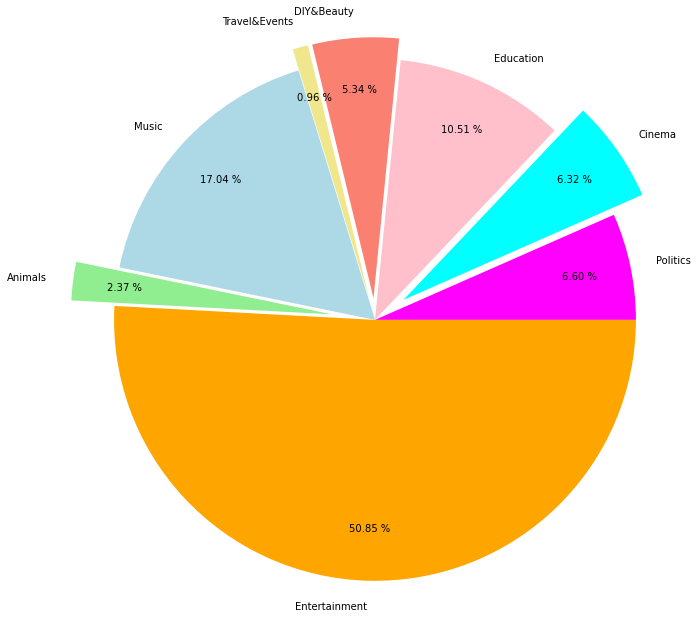

In [109]:
# Based on data in categories.csv we can found out the distribution of videos by Categories

politics = usa.loc[(usa.category_id >= 100) & (usa.category_id <= 102)].count()[0]
cinema = usa.loc[(usa.category_id >= 200) & (usa.category_id <= 204)].count()[0]
education = usa.loc[(usa.category_id >= 300) & (usa.category_id <= 302)].count()[0]
diy_and_beauty = usa.loc[(usa.category_id >= 400) & (usa.category_id <= 497)].count()[0]
travel_and_events = usa.loc[(usa.category_id >= 500) & (usa.category_id <= 551)].count()[0]
music = usa.loc[(usa.category_id >= 600) & (usa.category_id <= 600)].count()[0]
animals = usa.loc[(usa.category_id >= 700) & (usa.category_id <= 700)].count()[0]
entertainment = usa.loc[(usa.category_id >= 800) & (usa.category_id <= 806)].count()[0]

categories = [politics, cinema, education, diy_and_beauty, travel_and_events, music, animals, entertainment]
explode = [0,.4,0,.25,.25,0,.5,0]
colors = ['magenta', 'cyan', 'pink', 'salmon', 'khaki', 'lightblue', 'lightgreen', 'orange']
labels = ['Politics', 'Cinema', 'Education', 'DIY&Beauty', 'Travel&Events', 'Music', 'Animals', 'Entertainment']

#plt.title('Distribution of videos by Categories!')

plt.pie(categories, labels=labels, radius=3, colors=colors, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()

## Views of the videos

#### A trending video with the fewest views (excluding those with 0 views)

In [116]:
usa[usa['views'] == usa['views'].min()].transpose()

,16285
video_id,y6KYFcta4SE
trending_date,18.26.01
title,"1 dead, others injured after Ky. school shooting"
channel_title,Newsy
publish_time,2018-01-23T15:30:01.000Z
views,549
likes,9
dislikes,0
comment_count,5
thumbnail_link,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg


In [117]:
# Video with the least views was a video called "1 dead, others injured after Ky. school shooting"
# with only 549 views.

*TOP 5 trending videos with the **LEAST** Views - excluding those with 0 views*

In [244]:
unique_videos_usa_least_views = (usa[usa['views'] > 0].sort_values(by='views', ascending=True)).drop_duplicates(subset=['video_id']).head(5)
unique_videos_usa_least_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
16285,y6KYFcta4SE,18.26.01,"1 dead, others injured after Ky. school shooting",Newsy,2018-01-23 15:30:01,549,9,0,5,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,US,",'shooting','kentucky','breaking news','u.s. n...",102.0
16499,dQMZLXaa1L8,18.27.01,Artwork Forge,Palo Alto Online,2018-01-10 23:53:56,658,1,0,0,https://i.ytimg.com/vi/dQMZLXaa1L8/default.jpg,False,False,False,Artwork Forge II - an art installation created...,US,",'[none]'",802.0
687,-JVITToppE0,17.16.11,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,2017-11-13 20:41:45,687,10,2,5,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the...,US,",'oregon','ducks','college athletics','college...",802.0
14504,zeQaJGkFyqQ,18.18.01,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,2018-01-16 12:16:44,748,9,0,0,https://i.ytimg.com/vi/zeQaJGkFyqQ/default.jpg,True,False,False,Three deputies and one police officer were sho...,NaN,NaN,NaN
179,qg0GdM60syI,17.14.11,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31 21:46:53,773,2,0,0,https://i.ytimg.com/vi/qg0GdM60syI/default.jpg,False,False,False,Anyone have one of those?,US,",'90s commercials','huffy'",302.0


#### A trending video with the maximum number of views

In [118]:
usa[usa['views'] == usa['views'].max()].transpose()

,44424
video_id,VYOjWnS4cMY
trending_date,18.02.06
title,Childish Gambino - This Is America (Official V...
channel_title,ChildishGambinoVEVO
publish_time,2018-05-06T04:00:07.000Z
views,2.25212e+08
likes,5.02345e+06
dislikes,343541
comment_count,517232
thumbnail_link,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg


In [246]:
# This view dont give us precise number of views for the most popular video, so we can found
# it other way.
usa['views'].max()

225211923

*TOP 5 trending videos with the **MOST** Views*

In [235]:
unique_videos_usa_most_views = usa.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id']).head()
unique_videos_usa_most_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
44424,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06 04:00:07,225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,US,",'childish gambino','rap','this is america','m...",600.0
7180,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06 17:58:51,149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",US,",'rewind','rewind 2017','youtube rewind 2017',...",806.0
40199,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20 04:00:03,148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,US,",'ariana','grande','no','tears','left','to','c...",600.0
40393,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20 10:40:51,139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,US,",'becky g','natti natasha','natti natasha musi...",600.0
44132,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02,123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,US,",'bighit','빅히트','방탄소년단','bts','bangtan','방탄','...",600.0


*Video with the most views was called **"Childish Gambino - This Is America (Official Video)** from channel **ChildsihGambinoVEVO** which had accumulated more than 225 million views.*

### Videos Titles

In [203]:
title_lengths = usa['title'].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, color=lightblue, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length (in characters)', ticklbl_size=11, lbl_size=12)
plt.tight_layout()

TypeError: object of type 'float' has no len()

### Correlation analysis

In [110]:
columns_needed = ['views', 'likes', 'dislikes', 'comment_count'] # only these columns needed this time
corr_matrix = usa[columns_needed].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849196,0.472210,0.617622
likes,0.849196,1.000000,0.447164,0.803065
dislikes,0.472210,0.447164,1.000000,0.700153
comment_count,0.617622,0.803065,0.700153,1.000000


###### The table above shows that there are correlation between ...

<ipython-input-142-6f4f7bfca622>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False)
<ipython-input-142-6f4f7bfca622>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False)


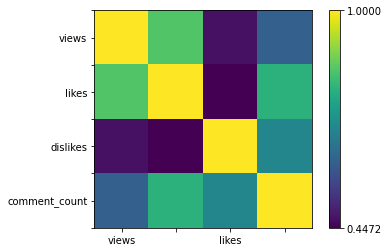

In [142]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest')

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in columns_needed:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

In [177]:
print(usa.shape)
usa = usa[~usa.index.duplicated(keep='last')]
print(usa.shape)
usa.index.dublicated().any()

(46978, 17)
(46978, 17)


AttributeError: 'Int64Index' object has no attribute 'dublicated'

##### Vides with the most likes, comments, dislikes and views.

*I will create a function that will take in a column name and visualize the videos that have the
most counts of likes, comments, dislikes and views.*

In [193]:
def visualize_most(my_df, column, num=10):
    sorted_df = usa.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:12] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

*Now we can call the 'visualize_most()' function while passing different column names*

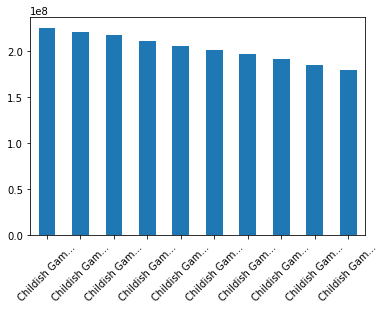

In [194]:
visualize_most(usa, 'views')

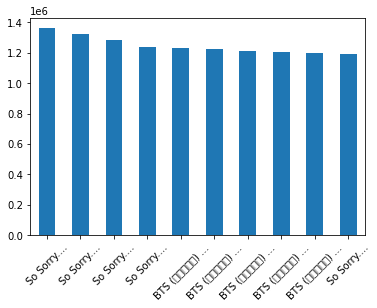

In [185]:
visualize_most(usa, 'comment_count')

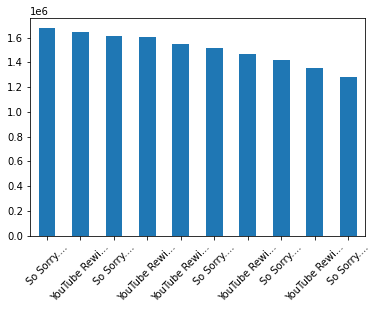

In [186]:
visualize_most(usa, 'dislikes')

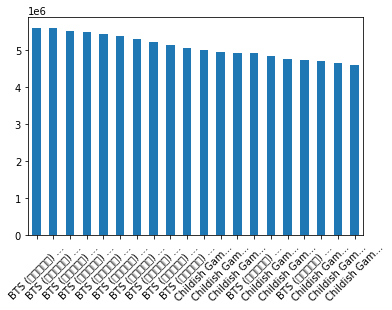

In [190]:
visualize_most(usa, 'likes', num=20)

## Analysis Results

*Note that for the following analyses I applied the analysis on all of the trending videos, not on the unique trending videos only. So if a video is considered trending for 3 days, then we believe that it has more trending power and more trending characteristics than a video that was trending for 1 day only; thus, it should have more weight. So we include the 3 occurrences of that video in the analysis.*